<h2><center>Isotropic Absorption with Delta Radiance Distribution in 2D</center></h2>

This notebook explores the numerical solution of the isotropic $P_1$ Approximation when only absorbing media is present and when using a Delta distribution as closure (see survey chapter 2.1.2) in 2-dimensional domain. We will place a unit point light at the center of the domain and compare the solution against groundtruth results.


---------------------------
Consider the classical diffusion equation with an isotropic, purely absorbing media:

$$\nabla\cdot(D\nabla\phi)= \sigma_t\phi -q$$

If we assume a delta distribution as the second moment of our radiance field, the $P_1$ approximation will give us the following advection equation (see survey chapter 2.1.2 for details):

$$\nabla\cdot\left (\frac{\phi}{\lVert \nabla\phi \rVert}\nabla\phi \right )= \sigma_t\phi -q$$

------------------------------------------------

We use the discretization of the divergence operator with finite differences:

$$\nabla\cdot\vec{v}=\frac{\vec{v}_{i+\frac{1}{2}, x}-\vec{v}_{i-\frac{1}{2}, x}}{h} + \frac{\vec{v}_{j+\frac{1}{2}, y}-\vec{v}_{j-\frac{1}{2}, y}}{h}$$

It is important to realize that $\vec{v}_{i+\frac{1}{2}}$ refers to the vector $\vec{v}$ at the voxel face which is adjacent to the next voxel to the right. Therefore the subscript $i+\frac{1}{2}$ just defines the location of the vector relative to the current voxel.

Applying the divergence operator discretization to the LHS of our equation results in:

$$\nabla\cdot\left(D\nabla\phi\right)=\frac{\left( D\nabla\phi\right)_{i+\frac{1}{2},x}-\left( D\nabla\phi\right)_{i-\frac{1}{2},x}}{h} + \frac{\left( D\nabla\phi\right)_{j+\frac{1}{2},y}-\left( D\nabla\phi\right)_{j-\frac{1}{2},y}}{h}=\sigma_{tij}\phi_{ij}-q_{ij}$$

multiplying this by h gives:

$$\left( D\nabla\phi\right)_{i+\frac{1}{2},x}-\left( D\nabla\phi\right)_{i-\frac{1}{2},x} + \left( D\nabla\phi\right)_{j+\frac{1}{2},y}-\left( D\nabla\phi\right)_{j-\frac{1}{2},y}=h\sigma_{tij}\phi_{ij} -hq_{ij}$$

The diffusion coefficient $D$ is a scalar, which is stored at the cell centers. Its value at the cell faces can be found by linear interpolation with the diffusion coefficient value of the respective neighbouring cell. We therefore get:

$$D_{i+\frac{1}{2},x}\nabla\phi_{i+\frac{1}{2},x}- D_{i-\frac{1}{2},x}\nabla\phi_{i-\frac{1}{2},x} + D_{j+\frac{1}{2},y}\nabla\phi_{j+\frac{1}{2},y}-D_{j-\frac{1}{2},y}\nabla\phi_{j-\frac{1}{2},y}=h\sigma_{tij}\phi_{ij} -hq_{ij}$$

with $D_{i+\frac{1}{2},x} = \frac{1}{2}\left(D_i+D_{i+1}\right)$ etc.

---------------------------------------
We now will substitute the discretizations of the vector $\nabla\phi$. Its components along the discretization axis are found straightforward by finite differences again:

$$\left ( \nabla\phi \right)_{i+\frac{1}{2}, x} = \frac{\phi_{i+1}-\phi_{i}}{h} = \frac{1}{h}\phi_{i+1} - \frac{1}{h}\phi_{i}$$
$$\left ( \nabla\phi \right)_{i-\frac{1}{2}, x} = \frac{\phi_{i}-\phi_{i-1}}{h} = \frac{1}{h}\phi_{i} - \frac{1}{h}\phi_{i-1}$$
$$\left ( \nabla\phi \right)_{j+\frac{1}{2}, y} = \frac{\phi_{j+1}-\phi_{j}}{h} = \frac{1}{h}\phi_{j+1} - \frac{1}{h}\phi_{j}$$
$$\left ( \nabla\phi \right)_{j-\frac{1}{2}, y} = \frac{\phi_{j}-\phi_{j-1}}{h} = \frac{1}{h}\phi_{j} - \frac{1}{h}\phi_{j-1}$$

giving:
$$
D_{i+\frac{1}{2},x}\frac{1}{h}\phi_{i+1} - D_{i+\frac{1}{2},x}\frac{1}{h}\phi_{i}
-D_{i-\frac{1}{2},x}\frac{1}{h}\phi_{i} + D_{i-\frac{1}{2},x}\frac{1}{h}\phi_{i-1}
D_{j+\frac{1}{2},y}\frac{1}{h}\phi_{j+1} - D_{j+\frac{1}{2},y}\frac{1}{h}\phi_{j}
-D_{j-\frac{1}{2},y}\frac{1}{h}\phi_{j} + D_{j-\frac{1}{2},y}\frac{1}{h}\phi_{j-1}
=h\sigma_{tij}\phi_{ij} -hq_{ij}
$$

---------------------------------------
In order to arrive at an update rule for the Gauss-Seidel method, we will bring all $\phi_{ij}$ to the LHS and everything else to the RHS:

$$
-D_{i+\frac{1}{2},x}\frac{1}{h}\phi_{ij}
-D_{i-\frac{1}{2},x}\frac{1}{h}\phi_{ij}
-D_{j+\frac{1}{2},y}\frac{1}{h}\phi_{ij}
-D_{j-\frac{1}{2},y}\frac{1}{h}\phi_{ij}
-h\sigma_{tij}\phi_{ij}
=
-\frac{1}{h}D_{i+\frac{1}{2},x}\phi_{i+1}
-\frac{1}{h}D_{i-\frac{1}{2},x}\phi_{i-1}
-\frac{1}{h}D_{j+\frac{1}{2},y}\phi_{j+1}
-\frac{1}{h}D_{j-\frac{1}{2},y}\phi_{j-1}
-hq_{ij}
$$

and factorize $\phi_{ij}$:
$$
-\frac{1}{h}
\left(
D_{i+\frac{1}{2},x}+
D_{i-\frac{1}{2},x}+
D_{j+\frac{1}{2},y}+
D_{j-\frac{1}{2},y}+
h^2\sigma_{tij}
\right)
\phi_{ij}
=
-\frac{1}{h}
\left(
D_{i+\frac{1}{2},x}\phi_{i+1}+
D_{i-\frac{1}{2},x}\phi_{i-1}+
D_{j+\frac{1}{2},y}\phi_{j+1}+
D_{j-\frac{1}{2},y}\phi_{j-1}+
h^2q_{ij}
\right)
$$

Now we isolate $\phi_{ij}$ on the LHS:
$$
\phi_{ij}
=
\frac{
D_{i+\frac{1}{2},x}\phi_{i+1}+
D_{i-\frac{1}{2},x}\phi_{i-1}+
D_{j+\frac{1}{2},y}\phi_{j+1}+
D_{j-\frac{1}{2},y}\phi_{j-1}+
h^2q_{ij}
}
{
D_{i+\frac{1}{2},x}+
D_{i-\frac{1}{2},x}+
D_{j+\frac{1}{2},y}+
D_{j-\frac{1}{2},y}+
h^2\sigma_{tij}
}
$$


In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
#from math import *
from util import *
import solver as solver

In [2]:
# setup domain ---
res = 161
size = 1.0
numIterations = 20500
domain = Domain2D(size, res)


def run_sim( domain, numIterations, sigma_t, Q, phi_boundary, D_boundary = None ):
    debug = False
    # setup/reset grids ---
    phi = np.zeros((domain.res, domain.res)) # scalar field for which we want to solve 
    D = np.zeros((domain.res, domain.res)) # diffusion coefficients
    if D_boundary is None:
        D_boundary = np.zeros((domain.res, domain.res)) # D boundary values for dirichlet boundary condition 

    # solve ---
    for step in range(numIterations):
        # call inner loop in c++
        solver.iterate_2d_isotropic_absorption(phi, D, sigma_t, Q, phi_boundary, D_boundary, domain.h, debug)
        
    return phi

## Experiment: Single Pointlight in Vacuum
----------------------------------------------

In the following cell, we discretize the pointlight at the domain center into the emission field and run the simulation. We distribute the unit power of the point light over the voxel area (2d) which explains the $1/(h^2)$ factor.

In [3]:
# SCENE: single pointlight -----------------------------------------------

# initialize sigma_t field ---
# here we assume sigma_t to be homogeneous
sigma_t_constant = 5.0
sigma_t = np.ones((domain.res, domain.res))*sigma_t_constant

# initialize emission field ---
Q = np.zeros((domain.res, domain.res))
pointlight1_center_ls = np.array([0.5, 0.5])
pointlight1_center_ws = domain.localToWorld(pointlight1_center_ls)
pointlight1_voxel = domain.voxelToIndex(domain.localToVoxel(pointlight1_center_ls))
Q[ pointlight1_voxel[0], pointlight1_voxel[1] ] = 1.0/(domain.h*domain.h)


def compute_phi_groundtruth(pWS):
    ''' Compute groundtruth solution for single pointlight
    '''
    center = pointlight1_center_ws
    lightDir = center-pWS
    dist = np.linalg.norm(lightDir)
    if not dist>0:
        return 0.0

    lightDir = lightDir/dist
    power = 1.0

    radiance = power/(2.0*np.pi)

    L0 = radiance
    L0 *= geometry_term_2d(center, None, pWS, None)
    sigma_t = sigma_t_constant
    L0 *= np.exp(-sigma_t*dist)
    
    return L0

# compute groundtruth results for validation and boundary conditions ---
phi_groundtruth = domain.rasterize(compute_phi_groundtruth)
gradphi_groundtruth = domain.gradient(phi_groundtruth)
def compute_D( phi, gradphi ):
	''' this function computes the diffusion coefficient from given phi and phi gradient values'''
	l = np.linalg.norm(gradphi)
	if l>0.0:
		return phi/l
	return 0.0
D_groundtruth = domain.rasterizeVS( lambda i,j:compute_D(phi_groundtruth[i,j], gradphi_groundtruth[i,j]) )


# initialize boundary values from groundtruth results ---
# we do this to see the solution without any boundary effects
D_boundary = np.copy(D_groundtruth)
phi_boundary = np.copy(phi_groundtruth)

# run simuation ---
phi = run_sim( domain, numIterations, sigma_t, Q, phi_boundary, D_boundary)

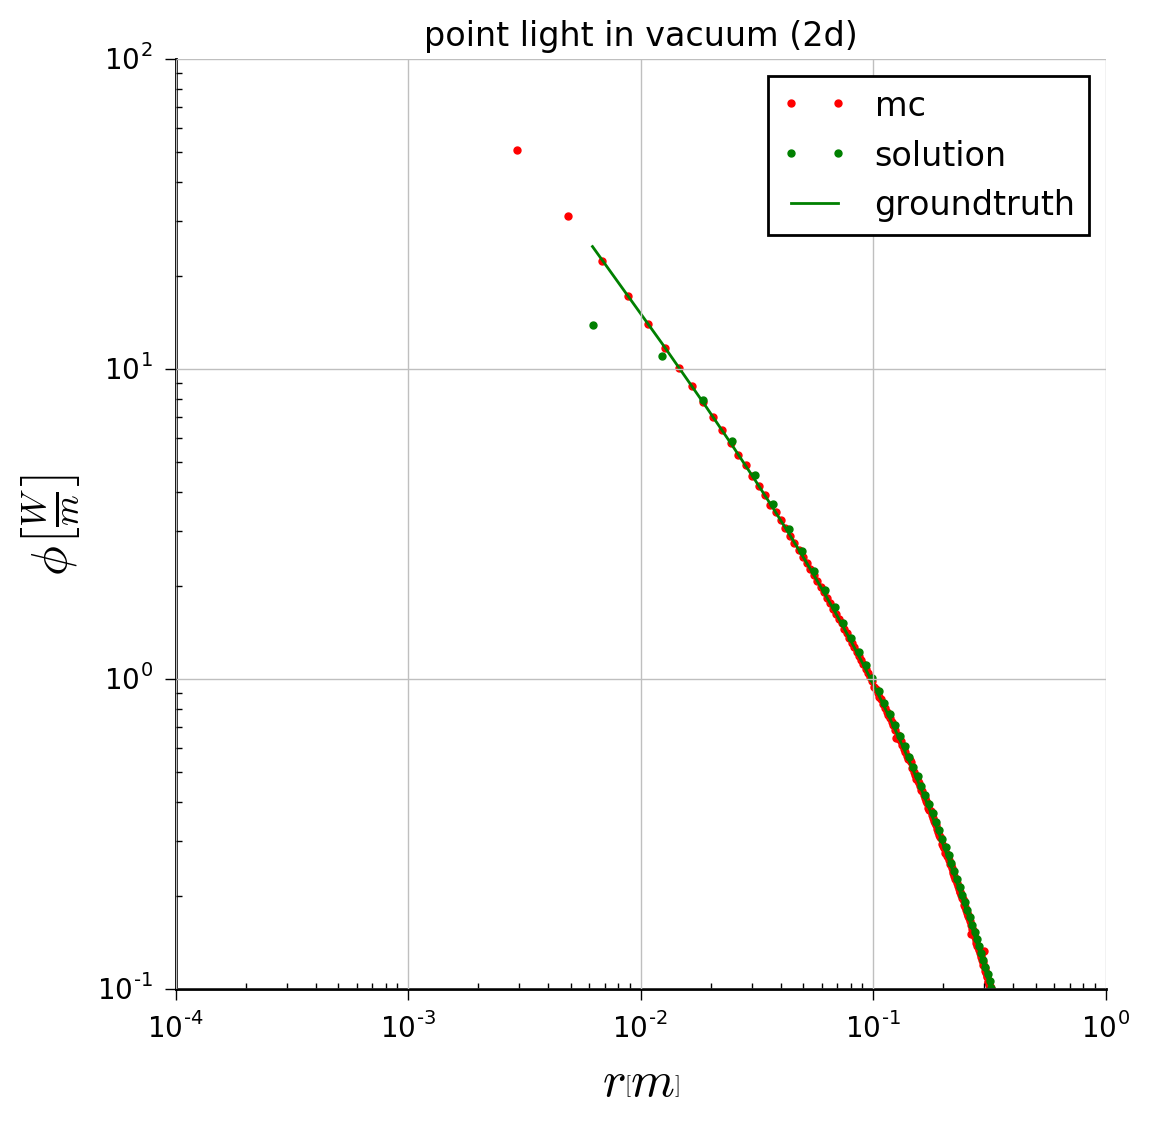

In [4]:
center_voxel = domain.voxelToIndex(domain.worldToVoxel(domain.localToWorld(np.array([0.5, 0.5]))))
domain_x = domain.rasterize( lambda pWS: pWS[0] )

domain2 = Domain2D(size, 512)
center_voxel2 = domain2.voxelToIndex(domain2.worldToVoxel(domain2.localToWorld(np.array([0.5, 0.5]))))
domain2_x = domain2.rasterize( lambda pWS: pWS[0] )
phi_groundtruth_mc = np.loadtxt("isotropic_absorption_2d/test.txt")

plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', direction='out')
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()
plt.ylim([10.0e-2,10.0e1])
plt.loglog( domain2_x[center_voxel2[0], center_voxel2[1]:], phi_groundtruth_mc[center_voxel2[0], center_voxel2[1]:], label="mc", color = 'r', linestyle=' ', marker='.', markersize=5 )
plt.loglog( domain_x[center_voxel[0], center_voxel[1]:], phi[center_voxel[0], center_voxel[1]:], label="solution", color = 'g', linestyle=' ', marker='.', markersize=5 )
plt.loglog( domain_x[center_voxel[0], center_voxel[1]:], phi_groundtruth[center_voxel[0], center_voxel[1]:], label="groundtruth", color = 'g' )
plt.title("point light in vacuum (2d)")
plt.xlabel(r'$r \left[m\right]$', fontsize=18)
plt.ylabel(r'$\phi \left[\frac{W}{m}\right]$', fontsize=18)
plt.grid(True, linestyle='-',color='0.75')
plt.legend(loc='best')
plt.draw()
plt.show()